# Data Science Internship

Candidato: Thaísa Adila Maranha

In [2]:
#Importando base de dados a ser trabalhada
import pandas as pd 

df = pd.read_csv("C:/Users/thais/tech_test.tsv")

In [3]:
# Se for o mesmo review_body, offer_title e o mesmo review_title consideramos duplicado.
print(df.shape)
df = df.drop_duplicates(subset=['review_body', 'offer_title', 'review_title'])
print(df.shape)

(20473, 25)
(18927, 25)


In [4]:
#Agora temos um conjunto de dados com 25 recursos e 18.927 linhas

In [43]:
#Importando bibliotecas que serão utilizadas 
from collections import Counter
import nltk
import string
from nltk.tokenize import word_tokenize
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from nltk.corpus import stopwords
import numpy as np
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import PorterStemmer
ps = PorterStemmer()
from nltk import pos_tag
from wordcloud import WordCloud

In [6]:
#Criando função para remover pontuação
def remove_punctuation(text):
    import string
    # remove pontuações sem espaços 
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [7]:
#Removendo a pontuação
df['review_body'] = df['review_body'].apply(remove_punctuation)

In [8]:
# extraindo as palavras irrelevantes da biblioteca nltk
sw = stopwords.words('english')
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [9]:
#Verificando a quantidade de palavras irrelevantes retornadas 
print("Number of stopwords: ", len(sw))

Number of stopwords:  179


In [10]:
#Criando função para remover paralavras irrelevantes 
def stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    return " ".join(text)

In [11]:
# Removendo as palavras irrelevantes 
df['review_body'] = df['review_body'].apply(stopwords)

Resolvi utilizar a lematização para me auxiliar no processo de verificar palavras recorrentes no review body, considerei mais válido nesse caso, ao invés o uso do stemmer. Após realizar os testes com os dois, a lematização me trouxe melhor resultado.

In [13]:
#Preparando a lista para contar a frequência de palavras 
reviewsList = df['review_body']

reviews = ' '.join(map(str, reviewsList)) 

tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

text = reviews

lemmaArray = []

tokens = word_tokenize(text)
lemma_function = WordNetLemmatizer()
for token, tag in pos_tag(tokens):
    lemma = lemma_function.lemmatize(token, tag_map[tag[0]])
    lemmaArray.append(lemma)

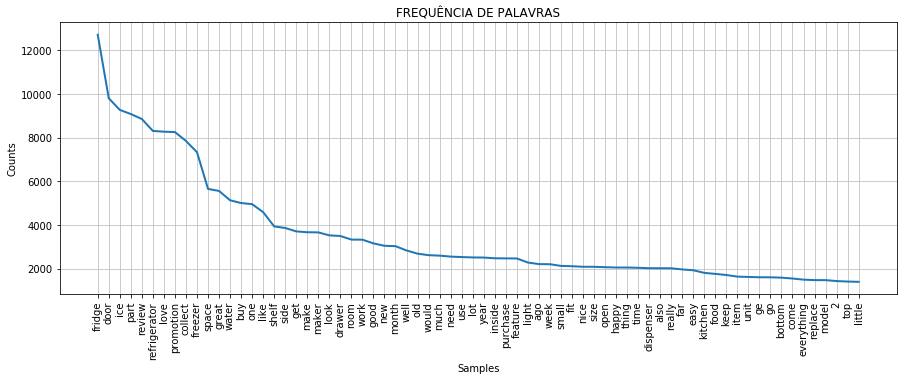

<Figure size 432x288 with 0 Axes>

In [57]:
#Contando a frequência de palavras 
reviews = ' '.join(map(str, lemmaArray)) 

tokens = [t for t in reviews.split()]

plt.figure(figsize=(15,5))
plt.title('FREQUÊNCIA DE PALAVRAS')
freqL = nltk.FreqDist(tokens)

freqL.plot(70, cumulative=False)

Escolhi utilizar a biblioteca SentimentIntensityAnalyzer para me ajudar a entender quais são os sentimentos apresentados nos reviews.

Em primeiro lugar, irei analisar os reviews com classificação igual a 5. 

In [15]:
#Separando os reviews que tiveram classificação = 5
review_sentPos = df['review_body'].loc[df["review_user_rating"] == 5]

reviewsPos = ' '.join(map(str, review_sentPos)) 

tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

text = reviewsPos

lemmaArrayPos = []

tokens = word_tokenize(text)
lemma_function = WordNetLemmatizer()
for token, tag in pos_tag(tokens):
    lemma = lemma_function.lemmatize(token, tag_map[tag[0]])
    lemmaArrayPos.append(lemma)

In [16]:
#Preparando a lista para classificar as palavras
reviewsPos = ' '.join(map(str, lemmaArrayPos)) 

review_sentPosF= [t for t in reviewsPos.split()]

#Preparando variáveis para classificar as palavras por sentimento
sid = SentimentIntensityAnalyzer()
Ppos_word_list=[]
Pneu_word_list=[]
Pneg_word_list=[]

#Verificando a classificação do sentimento das palavras
for word in review_sentPosF:
    if (sid.polarity_scores(word)['compound']) >= 0.5:
        Ppos_word_list.append(word)
    elif (sid.polarity_scores(word)['compound']) <= -0.5:
        Pneg_word_list.append(word)
    else:
        Pneu_word_list.append(word)                

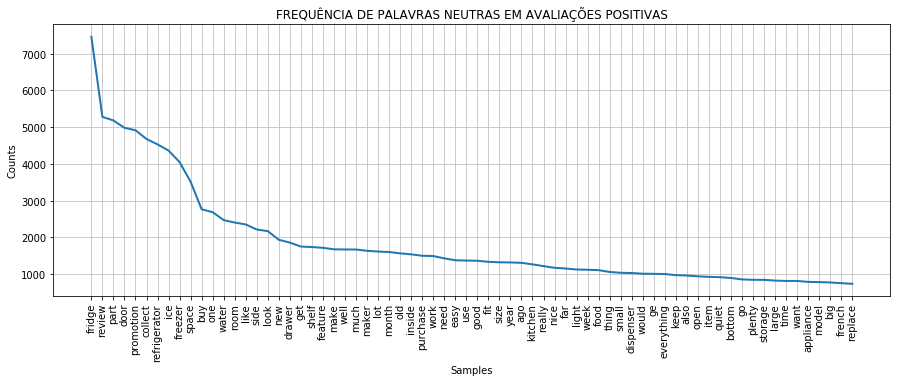

In [62]:
#Verificando a frequência das palavras neutras em avaliações positivas 
plt.figure(figsize=(15,5))
plt.title('FREQUÊNCIA DE PALAVRAS NEUTRAS EM AVALIAÇÕES POSITIVAS')

freq_review_sentPos = nltk.FreqDist(Pneu_word_list)
freq_review_sentPos.plot(70, cumulative=False)

Agora irei analisar os sentimentos das palavras dos reviews com classificação menor ou igual a 3.

In [18]:
#Separando os reviews que tiveram classificação <= 3
review_sentBad = df['review_body'].loc[df["review_user_rating"] <= 3]

reviewsBad = ' '.join(map(str, review_sentBad)) 

tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

text = reviewsBad

lemmaArrayBad = []

tokens = word_tokenize(text)
lemma_function = WordNetLemmatizer()
for token, tag in pos_tag(tokens):
    lemma = lemma_function.lemmatize(token, tag_map[tag[0]])
    lemmaArrayBad.append(lemma)

In [19]:
#Preparando variáveis para classificar as palavras por sentimento
sid = SentimentIntensityAnalyzer()
Bpos_word_list=[]
Bneu_word_list=[]
Bneg_word_list=[]

#Verificando a classificação do sentimento das palavras
for word in lemmaArrayBad:
    if (sid.polarity_scores(word)['compound']) >= 0.5:
        Bpos_word_list.append(word)
    elif (sid.polarity_scores(word)['compound']) <= -0.5:
        Bneg_word_list.append(word)
    else:
        Bneu_word_list.append(word)                

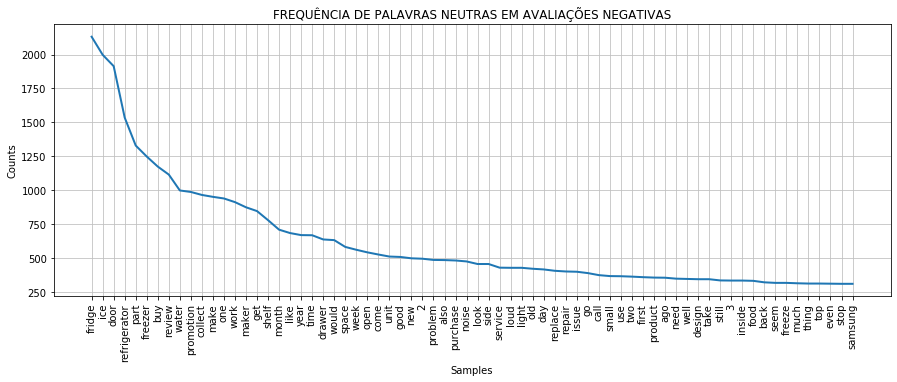

In [53]:
#Verificando a frequência das palavras neutras em avaliações negativas
plt.figure(figsize=(15,5))
plt.title('FREQUÊNCIA DE PALAVRAS NEUTRAS EM AVALIAÇÕES NEGATIVAS')

freq_review_sentBad = nltk.FreqDist(Bneu_word_list)
freq_review_sentBad.plot(70, cumulative=False)

Agora irei analisar os sentimentos das palavras dos reviews com classificação igual a 4.

In [21]:
#Separando os reviews que tiveram classificação = 4
review_sentNeu = df['review_body'].loc[df["review_user_rating"] == 4]

reviewsNeu = ' '.join(map(str, review_sentNeu)) 

tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

text = reviewsNeu

lemmaArrayNeu = []

tokens = word_tokenize(text)
lemma_function = WordNetLemmatizer()
for token, tag in pos_tag(tokens):
    lemma = lemma_function.lemmatize(token, tag_map[tag[0]])
    lemmaArrayNeu.append(lemma)

In [22]:
#Preparando variáveis para classificar as palavras por sentimento
sid = SentimentIntensityAnalyzer()
Npos_word_list=[]
Nneu_word_list=[]
Nneg_word_list=[]

#Verificando a classificação do sentimento das palavras
for word in lemmaArrayNeu:
    if (sid.polarity_scores(word)['compound']) >= 0.5:
        Npos_word_list.append(word)
    elif (sid.polarity_scores(word)['compound']) <= -0.5:
        Nneg_word_list.append(word)
    else:
        Nneu_word_list.append(word)                

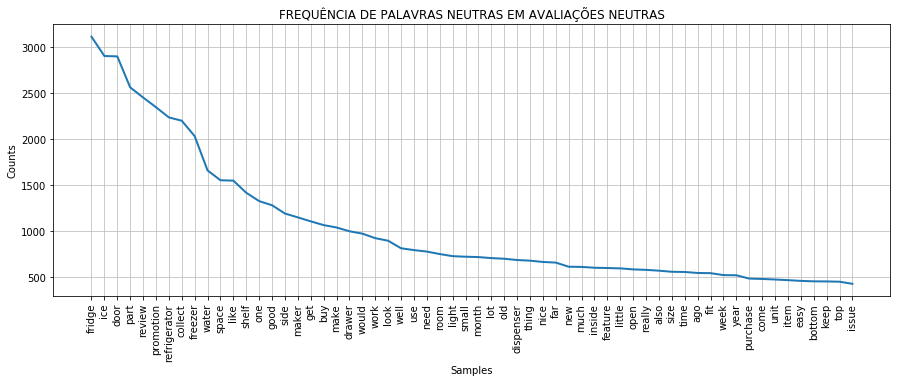

In [67]:
#Verificando a frequência das palavras neutras em avaliações neutras
plt.figure(figsize=(15,5))
plt.title('FREQUÊNCIA DE PALAVRAS NEUTRAS EM AVALIAÇÕES NEUTRAS')

freq_review_sentNeu = nltk.FreqDist(Nneu_word_list)
freq_review_sentNeu.plot(60, cumulative=False)

Escolhi criar uma função para utilizar somente os substantivos e adjetivos utilizados nos reviews.

In [60]:
def prepare_review_body(desc):
    tokens = word_tokenize(desc)
        
    token_tag = pos_tag(tokens)
    
    include_tags = ['NN', 'NNS']
    filtered_tokens = [tok for tok, tag in token_tag if tag in include_tags]
    
    stemmed_tokens = [ps.stem(tok).lower() for tok in filtered_tokens]
    return set(stemmed_tokens)

Separei a classificação dos reviews, considerando:
   - positivas: classificação igual a 5
   - neutras: classificação igual a 4
   - negativas: classificação menor ou igual a 3

In [61]:
#Aplicando a função para utilizar somente adjetivos e substantivos

#Positivas
WCreviewPos = review_sentPos.apply(prepare_review_body)

#Neutras
WCreviewNeu = review_sentNeu.apply(prepare_review_body)

#Negativas
WCreviewBad = review_sentBad.apply(prepare_review_body)

In [47]:
#Preparando as listas
#Positivas
reviewsPosWC = ' '.join(map(str, WCreviewPos)) 

tokensPosWC = [t for t in reviewsPosWC.split()]

#Neutras
reviewsNeuWC = ' '.join(map(str, WCreviewNeu)) 

tokensNeuWC = [t for t in reviewsNeuWC.split()]

#Negativas
reviewsBadWC = ' '.join(map(str, WCreviewBad)) 

tokensBadWC = [t for t in reviewsBadWC.split()]

In [48]:
#Criando função para wordcloud
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        collocations=False,
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (18, 18))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

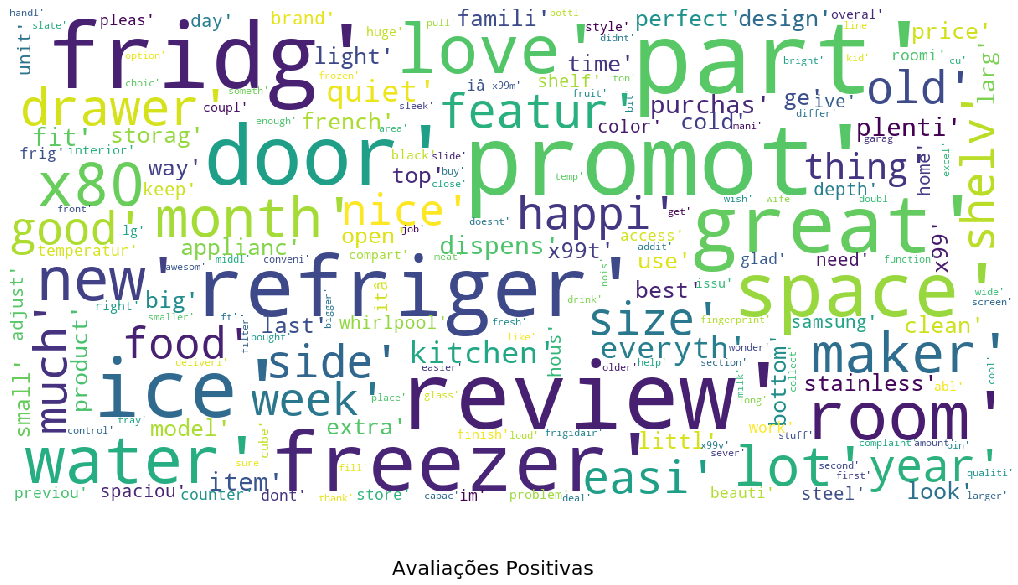

In [49]:
#wordcloud positivas
show_wordcloud(tokensPosWC, title = 'Avaliações Positivas')

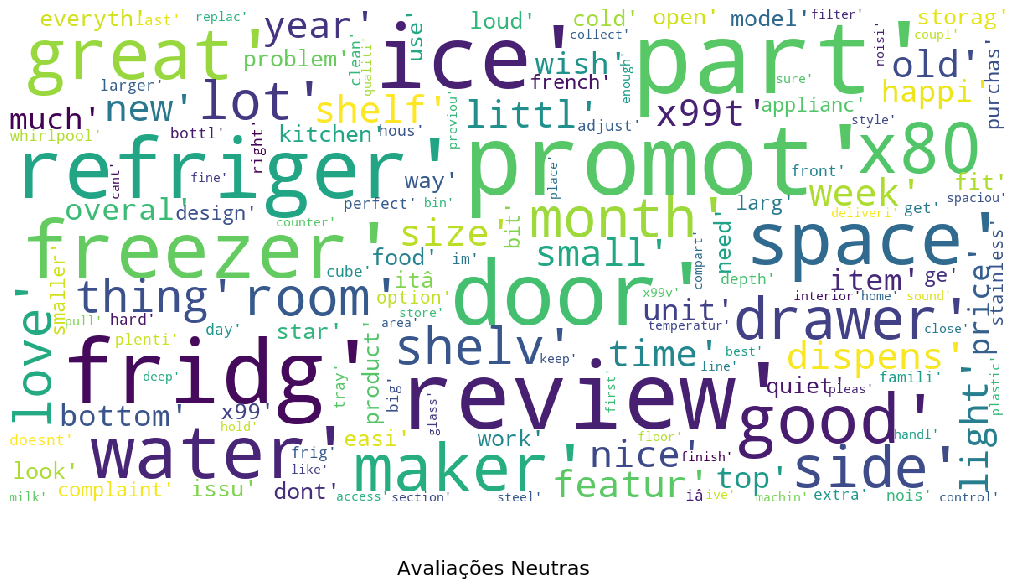

In [50]:
#wordcloud neutras
show_wordcloud(tokensNeuWC, title = 'Avaliações Neutras')

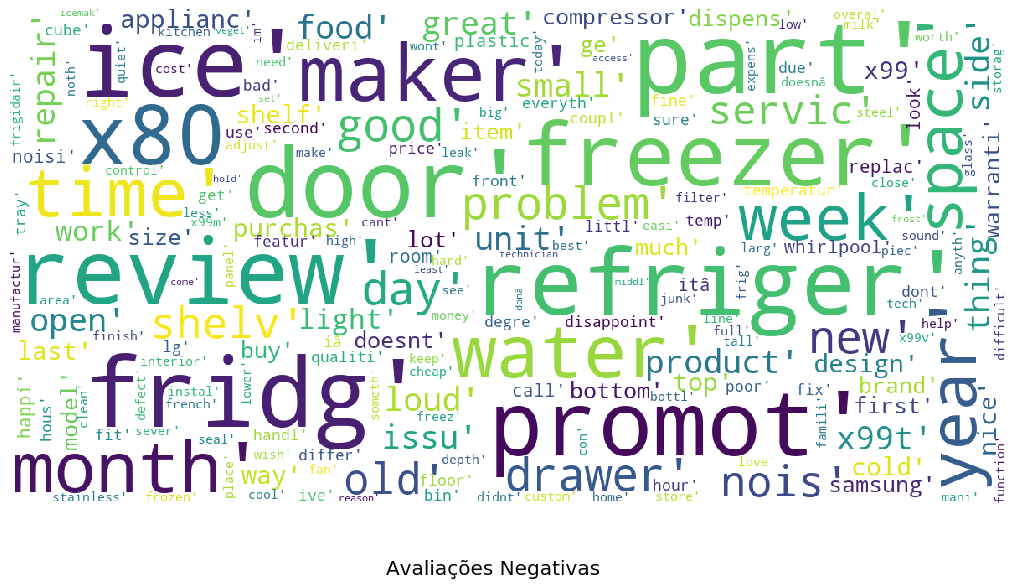

<Figure size 432x288 with 0 Axes>

In [56]:
#wordcloud negativas
show_wordcloud(tokensBadWC, title = 'Avaliações Negativas')

# Conclusões

Ao analisarmos as frequências de palavras no geral, conseguimos notar algumas palavras que falam sobre: 
   - promotion 
   - size
   - model
   - door
   - freezer

Quando analisamos apenas as palavras neutras das avaliações positivas, que classificaram como 5, notamos algumas palavras que não apareceram anteriormente, como: 
   - storage
   - large 
   - french
   - quiet
   - light

Quando analisamos apenas as palavras neutras das avaliações negativas, que classificaram menor ou igual a 3, notamos algumas palavras que não apareceram anteriormente, como:

- noise
- service
- product
- small
- Sansung

# Algumas hipóteses

Seria interessante a partir dessa visualização utilizar o método de NGRAM, para entendermos melhor o contextos das utilizações de palavras.

Outro ponto, seria a utilização de NER(named entity recognition), para verificarmos quais empresas estão sendo citadas nos reviews e termos uma melhor definição das entidades presentes nos reviews. 

Além disso, utilizar chunk pattern para auxiliar no processo de analisar os padrões, por conseguinte, verificar as sequências de tokens, uma regra muito utilizada para esse processo é: 
   - pattern = 'NP: {DT? JJ * NN}'
    
A frase nominal, NP, deve ser formada sempre que for encontrado um determinante opcional, DT, em seguida um número qualquer de adjetivos, JJ, e por último, um substantivo NN.
    


Outro ponto, seria trabalhar a dimensionalidade, pois está alta e demoraria para treinar um modelo. Com o recurso de feature extraction, poderíamos fazer uma redução dimensional e utilizar somente padrões relevantes. 

E por último, utilizar Topic Modelling, para encontrarmos padrões ocultos de estruturas de semânticas nos reviews e trabalharmos separadamente cada tópico. 

# Alguns insights

Bom, notei que há um certo desconforto com relação ao barulho emitido pela geladeira, pois aparece a palavra "quiet" em avaliações positivas e "noise" em avaliações negativas. 

Foi notado também a palavra "service" em avaliações negativas, algum tipo de atendimento ou prestação de serviço de entrega está gerando frustrações nos clientes.

O tamanho se mostrou um fato que pode agradar ou não o cliente, com a apresentação da palavra "large" e "small" em avaliações positivas e negativas, respectiviamente.

Além disso, algumas marcas aparecem com frequência em avaliações negativas, como Sansung e LG.